In [1]:
from scatter import *
%matplotlib inline

In [2]:
from __future__ import print_function

import sys
import numpy as np
import math

import brfss
import thinkplot
import thinkstats2

In [3]:
df = brfss.ReadBrfss(nrows=None)


In [46]:
sample = thinkstats2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

/Users/nathankiner/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/nathankiner/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


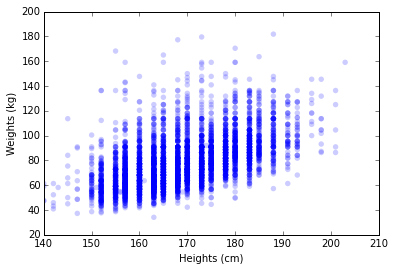

In [4]:
thinkplot.Scatter(heights, weights)
thinkplot.Show(xlabel='Heights (cm)', ylabel='Weights (kg)', axis=[140, 210, 20, 200])

In [9]:
heights = thinkstats2.Jitter(heights, 1.3)
weights = thinkstats2.Jitter(weights, 0.5)

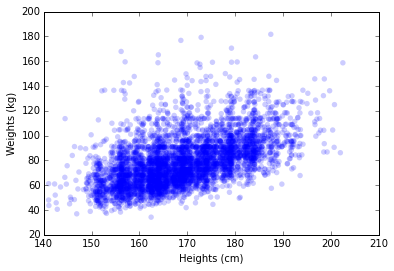

In [15]:
thinkplot.Scatter(heights, weights, alpha=0.2)
thinkplot.Show(xlabel='Heights (cm)', ylabel='Weights (kg)', axis=[140, 210, 20, 200])

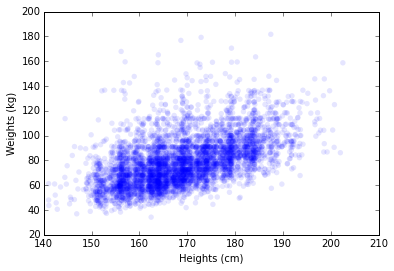

In [16]:
thinkplot.Scatter(heights, weights, alpha=0.1)
thinkplot.Show(xlabel='Heights (cm)', ylabel='Weights (kg)', axis=[140, 210, 20, 200])

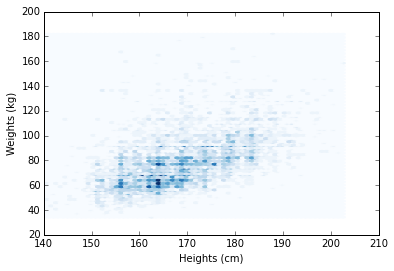

In [19]:
thinkplot.HexBin(heights, weights)
thinkplot.Show(xlabel='Heights (cm)', ylabel='Weights (kg)', axis=[140, 210, 20, 200])

In [38]:
df = df.dropna(subset=['htm3', 'wtkg2'])
df.describe()

,age,sex,wtyrago,finalwt,wtkg2,htm3
count,393518.000000,395832.000000,388137.000000,395832.000000,395832.000000,395832.000000
mean,54.891207,1.612730,79.766921,562.527274,79.044413,168.956188
std,16.742237,0.487127,20.574880,1076.206594,19.547890,10.390752
min,18.000000,1.000000,22.727273,1.695143,20.000000,61.000000
25%,43.000000,1.000000,64.545455,97.241254,64.550000,163.000000
50%,55.000000,2.000000,77.272727,234.914579,77.270000,168.000000
75%,67.000000,2.000000,90.909091,593.585278,90.910000,178.000000
max,99.000000,2.000000,342.272727,60995.111700,300.000000,236.000000


In [53]:
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

In [54]:
for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


In [55]:
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

ValueError: x and y must have same first dimension

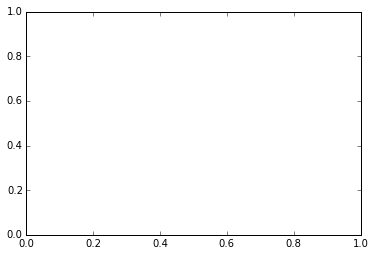

In [49]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth percent' % percent
    thinkplot.Plot(heights, weights, label=label)

In [47]:
thinkstats2.Cov(heights, weights)

105.82155294999997

In [48]:
thinkstats2.Corr(heights, weights)

0.51763333445295123